In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import distributions as dist

In [0]:
n = 100
x = dist.uniform(0,20).rvs(n)
x = x[np.argsort(x)]
y1_true = 4 + 0.5*x
y_obs = y1_true + dist.norm(0,0.5).rvs(n)

X = np.c_[np.ones(n),x]

In [0]:
Theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_obs)

In [0]:
sigma_squared = 1/n * sum(y1_true - y_obs )**2

In [0]:
mu = X.dot(Theta)

In [0]:
s = np.random.normal(mu, sigma_squared, 100)

In [0]:
x_test = dist.uniform(20,25).rvs(n)
X_test = np.c_[np.ones(n),x_test]

In [0]:
mu_test = X_test.dot(Theta)

In [0]:
v = np.random.normal(mu_test, sigma_squared, 100)

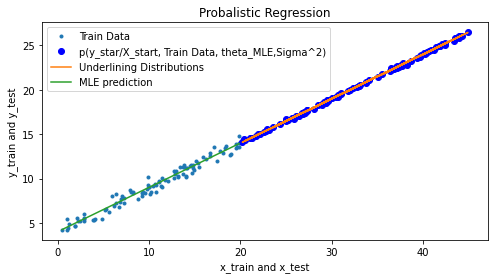

In [12]:
fig = plt.figure(figsize=(8,4))
plt.plot(x,y_obs,'.',label = 'Train Data')
plt.plot(x_test, v,'o',label = 'p(y_star/X_start, Train Data, theta_MLE,Sigma^2)',color = 'b')
plt.plot(x_test,mu_test,label = 'Underlining Distributions')
plt.plot(x,y1_true,'-',label = 'MLE prediction')
plt.xlabel('x_train and x_test')
plt.ylabel('y_train and y_test')
plt.title('Probalistic Regression')
plt.legend()
plt.show()